# A. Descriptive Statistics

Before modeling, we need to understand what the data is actually doing. Descriptive statistics are the first pass: simple numbers that summarize large, messy reality.  

This section explores what these statistics mean, when they mislead, and how the break in the presence of outliers.

## A.1 What descriptive statistics are (and are not)

Summaries compress information, and compression always loses detail.  

<table style="text-align:left;">
    <thead>
        <tr>
            <th>What they do well</th>
            <th>What they hide</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Give fast orientation</td>
            <td>Multimodality and skew</td>
        </tr>
        <tr>
            <td>Enable comparisons</td>
            <td>Outliers adn tail risk</td>
        </tr>
        <tr>
            <td>Support sanity checks</td>
            <td>Group-level structure</td>
        </tr>
    </tbody>
</table>

**EDA RULE #1**
Never trust a single number without seeing the distribution it came from

### Microlab: One "average", two totally different realities  

Two datasets can share the same mean and still behave very differently. 

A mean: 10.0 A median: 10.0
B mean: 10.0 B median: 0.0


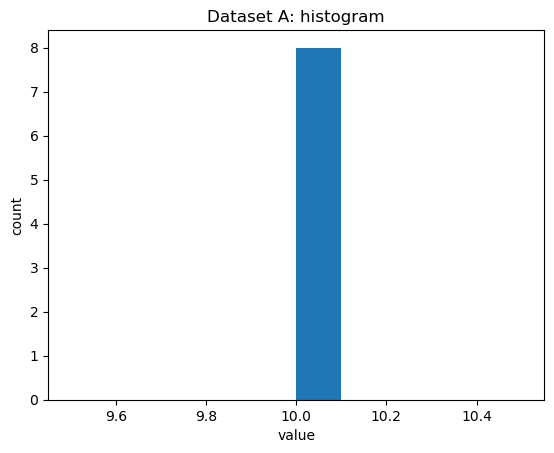

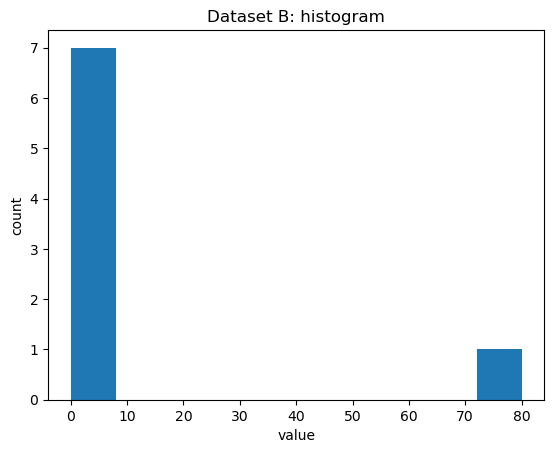

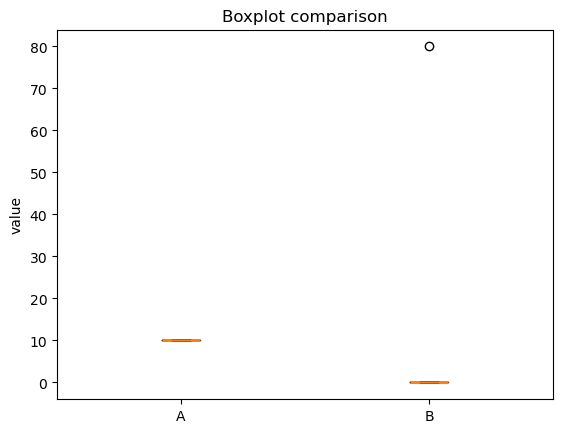


Key ideas:
1) The same mean can come from totally different distributions.
2) Descriptive stats compress information — the shape still matters.
3) Plots are not decoration; they're a sanity check on your summaries.

Try:
- Create dataset C with TWO modes (e.g., many 0s and many 20s). Same mean, new story.
- Add 2–3 moderate outliers instead of one extreme outlier — how do the plots change?
- Swap the histogram bins (10 vs 50). What stays the same? What changes?


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

# Two datasets with the same mean (~10), very different shapes
a = pd.Series([10,10,10,10,10,10,10,10])
b = pd.Series([0,0,0,0,0,0,0,80])

print("A mean:", float(a.mean()), "A median:", float(a.median()))
print("B mean:", float(b.mean()), "B median:", float(b.median()))

plt.figure()
plt.hist(a, bins=10)
plt.title("Dataset A: histogram")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(b, bins=10)
plt.title("Dataset B: histogram")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.boxplot([a, b], tick_labels=["A", "B"])
plt.title("Boxplot comparison")
plt.ylabel("value")
plt.show()

print("\nKey ideas:")
print("1) The same mean can come from totally different distributions.")
print("2) Descriptive stats compress information — the shape still matters.")
print("3) Plots are not decoration; they're a sanity check on your summaries.")

print("\nTry:")
print("- Create dataset C with TWO modes (e.g., many 0s and many 20s). Same mean, new story.")
print("- Add 2–3 moderate outliers instead of one extreme outlier — how do the plots change?")
print("- Swap the histogram bins (10 vs 50). What stays the same? What changes?")

# A.2 Central Tendency

"Typical" depends on how your data misbehaves  

<table style="text-align:left;">
    <thead>
        <tr>
            <th>Statistic</th>
            <th>What it answers</th>
            <th>Failure mode</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Mean</td>
            <td>Average value</td>
            <td>Dragged by outliers</td>
        </tr>
        <tr>
            <td>Median</td>
            <td>Middle observation</td>
            <td>Ignores tail magnitude</td>
        </tr>
        <tr>
            <td>Mode</td>
            <td>Most common value</td>
            <td>Unstable / non-unique</td>
        </tr>
    </tbody>
</table>

### Microlab: Mean vs Median under skew (with plot)  

Add one extreme value, watch the mean move while the median stays put


Original:
 n: 7
 mean: 12.142857142857142
 median 12.0

With outlier:
 n: 8
 mean: 73.125
 median 12.5


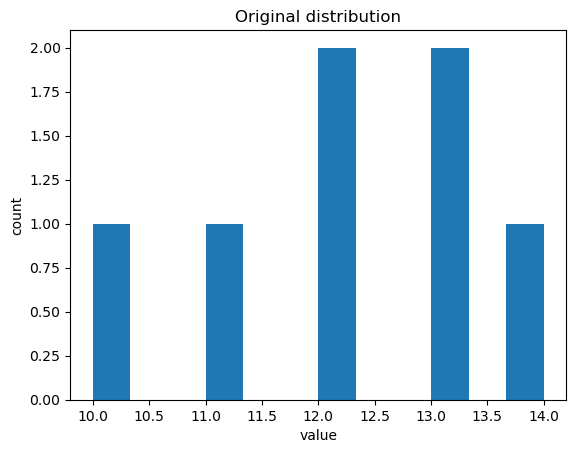

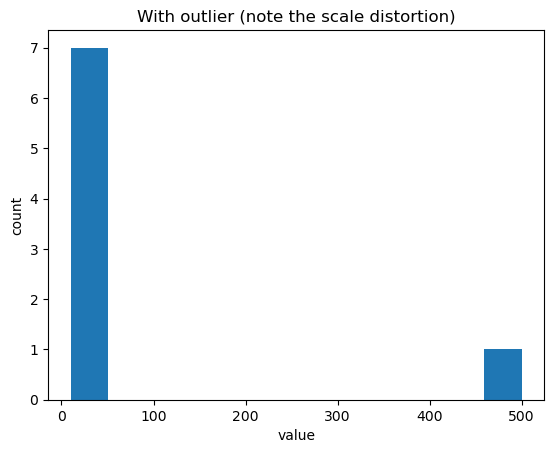

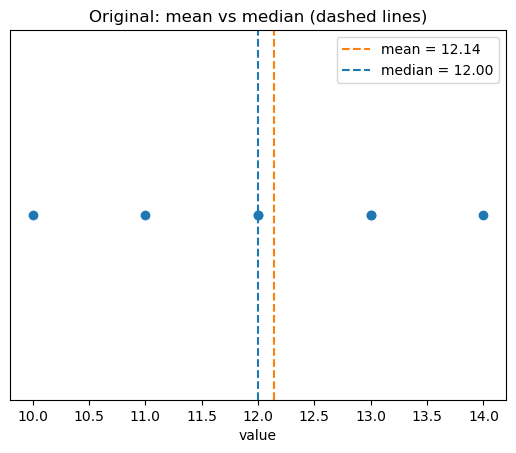

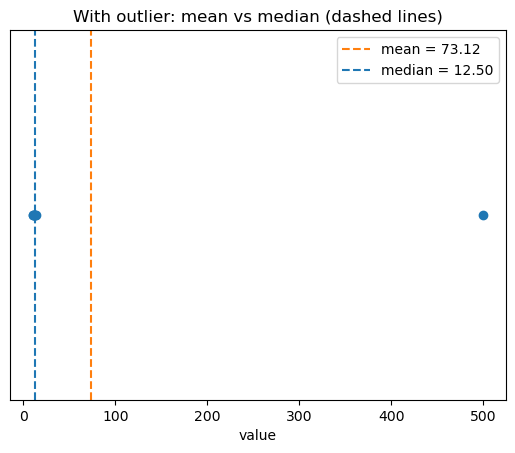


Key ideas:
1) Mean is sensitive to extreme values; median is robust.
2) 'Typical' depends on your decision context (risk vs average).
3) Always pair a center statistic with a plot of the distribution.

Try:
- Replace 500 with 40. Does the mean still feel misleading?
- Add TWO outliers (e.g., 200 and 500). What happens to mean vs median?
- Create a right-skewed dataset (e.g., exponential) and compare mean/median.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

data = pd.Series([10, 11, 12, 12, 13, 13, 14])
data_outlier = pd.concat([data, pd.Series([500])], ignore_index=True)

def summarize(x, name):
    print(f"\n{name}:")
    print(" n:", len(x))
    print(" mean:", float(x.mean()))
    print(" median", float(x.median()))

summarize(data, "Original")
summarize(data_outlier, "With outlier")

plt.figure()
plt.hist(data, bins=12)
plt.title("Original distribution")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(data_outlier, bins=12)
plt.title("With outlier (note the scale distortion)")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.plot(np.sort(data.values), np.zeros(len(data)), "o")
plt.axvline(
    data.mean(),
    linestyle="--",
    color="tab:orange",
    label=f"mean = {data.mean():.2f}"
)
plt.axvline(
    data.median(),
    linestyle="--",
    color="tab:blue",
    label=f"median = {data.median():.2f}"
)
plt.legend()
plt.title("Original: mean vs median (dashed lines)")
plt.yticks([])
plt.xlabel("value")
plt.show()

plt.figure()
plt.plot(np.sort(data_outlier.values),np.zeros(len(data_outlier)), "o")
plt.axvline(
    data_outlier.mean(),
    linestyle="--",
    color="tab:orange",
    label=f"mean = {data_outlier.mean():.2f}"
)
plt.axvline(
    data_outlier.median(),
    linestyle="--",
    color="tab:blue",
    label=f"median = {data_outlier.median():.2f}"
)
plt.legend()
plt.title("With outlier: mean vs median (dashed lines)")
plt.yticks([])
plt.xlabel("value")
plt.show()

print("\nKey ideas:")
print("1) Mean is sensitive to extreme values; median is robust.")
print("2) 'Typical' depends on your decision context (risk vs average).")
print("3) Always pair a center statistic with a plot of the distribution.")

print("\nTry:")
print("- Replace 500 with 40. Does the mean still feel misleading?")
print("- Add TWO outliers (e.g., 200 and 500). What happens to mean vs median?")
print("- Create a right-skewed dataset (e.g., exponential) and compare mean/median.")

